In [ ]:
import seaborn as sas

In [ ]:
import pandas as pd    # a wonderful dataframe to work with
import numpy as np     # adding a number of mathematical and science functions
import seaborn as sns  # a very easy to use statistical data visualization package
import matplotlib.pyplot as plt # a required plotting tool
import warnings
# sklearn is a big source of pre-written and mostly optimized ML algorithms.
# Here we use their Decision trees, Support Vector Machines, and the classic Perceptron. 
from sklearn import preprocessing, svm   
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
#ignore warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import files
uploaded= files.upload()


In [ ]:
import io
import pandas as pd

In [ ]:
data=pd.read_csv(io.BytesIO(uploaded['OurData.csv']))
data.head()


In [ ]:
# Translate GradeID from categorical to numerical
gradeID_dict = {"G-01" : 1,
                "G-02" : 2,
                "G-03" : 3,
                "G-04" : 4,
                "G-05" : 5,
                "G-06" : 6,
                "G-07" : 7,
                "G-08" : 8,
                "G-09" : 9,
                "G-10" : 10,
                "G-11" : 11,
                "G-12" : 12}

data = data.replace({"GradeID" : gradeID_dict})

class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
data = data.replace({"Class" : class_dict})

# Scale numerical fields
data["GradeID"] = preprocessing.scale(data["GradeID"])
data["raisedhands"] = preprocessing.scale(data["raisedhands"])
data["VisITedResources"] = preprocessing.scale(data["VisITedResources"])
data["AnnouncementsView"] = preprocessing.scale(data["AnnouncementsView"])
data["Discussion"] = preprocessing.scale(data["Discussion"])

# Use dummy variables for categorical fields
data = pd.get_dummies(data, columns=["gender",
                                     "NationalITy",
                                     "PlaceofBirth",
                                     "SectionID",
                                     "StageID",
                                     "Topic",
                                     "Semester",
                                     "Relation",
                                     "ParentAnsweringSurvey",
                                     "ParentschoolSatisfaction",
                                     "StudentAbsenceDays"])

# Show preprocessed data
data.head()


,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-0.563838,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
1,-0.563838,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,-0.563838,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,-0.563838,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,-0.563838,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


The code performs preprocessing steps on a dataset. Specifically, it:

*   Translates the categorical variable "GradeID" into numerical values using a dictionary.

*   Translates the categorical variable "Class" into numerical values using a dictionary.
*   Scales the numerical fields "GradeID", "raisedhands", "VisITedResources", "AnnouncementsView", and "Discussion" using the preprocessing.scale function from the scikit-learn library.
*   Uses dummy variables to represent the categorical fields "gender", "NationalITy", "PlaceofBirth", "SectionID", "StageID", "Topic", "Semester", "Relation", "ParentAnsweringSurvey", "ParentschoolSatisfaction", and "StudentAbsenceDays" using the pd.get_dummies function from the pandas library.
*   Displays the preprocessed data using the head method.

In [ ]:
corr = data.corr()
corr.iloc[[5]]

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
Class,0.071654,0.646298,0.677094,0.52737,0.308183,1.0,0.26349,-0.26349,-0.02631,-0.054841,...,-0.126239,0.126239,-0.401142,0.401142,-0.435495,0.435495,-0.375901,0.375901,-0.671312,0.671312


corr is a pandas DataFrame containing the correlation coefficients between all pairs of columns in the data DataFrame.

The code corr.iloc[[5]] selects the 6th row of the corr DataFrame (indexing starts at 0), which is a pandas Series containing the correlation coefficients between the 5th column (index 4) of the data DataFrame and all other columns.

In other words, it is showing the correlation coefficients of the "Class" column with all other columns in the data DataFrame.

In [ ]:
from sklearn.linear_model import Perceptron
perc = Perceptron(max_iter=100, eta0=0.1, random_state=15)


The code is configuring an instance of the Perceptron classifier by setting the hyperparameters n_iter, eta0, and random_state.

n_iter is the number of iterations the algorithm will go through to train the model. eta0 is the learning rate, which controls the step size at each iteration. random_state is the seed value for the random number generator, which ensures that the results are reproducible.

The purpose of the code is to create an instance of the Perceptron classifier with specific hyperparameters for use in training a machine learning model on a dataset.

#**Split Data, Train, and Test - Perceptron** 

In [ ]:
results = []
predMiss = []

for _ in range(1000):
    # Randomly sample our training data
    data_train = data.sample(frac=0.7)
    # train data without label
    data_train_X = data_train.loc[:, lambda x: [l for l in data if l != "Class"]]
    # labels of train data 
    data_train_Y = data_train.loc[:, lambda x: "Class"]

    # The rest is test data
    data_test = data.loc[~data.index.isin(data_train.index)]
    # Test data without label
    data_test_X = data_test.loc[:, lambda x: [l for l in data if l != "Class"]]
    # labels of test data 
    data_test_Y = data_test.loc[:, lambda x: "Class"]

    # Train svm
    perc.fit(data_train_X, data_train_Y)
    predMiss.append((data_test_Y != perc.predict(data_test_X)).sum())
    # Score the mean accuracy on the test data and append results in a list
    results.append(perc.score(data_test_X, data_test_Y))

# Convert results to an array and look at the minimum and the average
predErr = np.hstack(predMiss)
Final = np.hstack(results)
print('Minimum Accuracy Score:   %.8f' % Final[Final.argmin()])
print('Maximum Accuracy Score:   %.8f' % Final[Final.argmax()])
print('Average Accuracy Score:   %.8f' % np.average(Final))
print('Minimum Prediction Misses:   %d' % predErr[predErr.argmin()])
print('Maximum Prediction Misses:   %d' % predErr[predErr.argmax()])
print('Average Prediction Misses:   %.2f' % np.average(predErr))

Minimum Accuracy Score:   0.47222222
Maximum Accuracy Score:   0.77777778
Average Accuracy Score:   0.64963194
Minimum Prediction Misses:   32
Maximum Prediction Misses:   76
Average Prediction Misses:   50.45


This code performs the following steps:

It initializes two empty lists: results and predMiss.
It loops 1000 times, randomly sampling 70% of the data as training data and the remaining 30% as test data.
It splits the training and test data into feature (X) and label (Y) sets.
It trains an SVM model (perc) on the training data and predicts the labels for the test data.
It appends the number of prediction misses (the number of misclassified test instances) to the predMiss list and the accuracy score of the SVM model on the test data to the results list.
After 1000 iterations, it converts the results and predMiss lists to arrays and prints the minimum, maximum, and average accuracy scores, as well as the minimum, maximum, and average number of prediction misses.

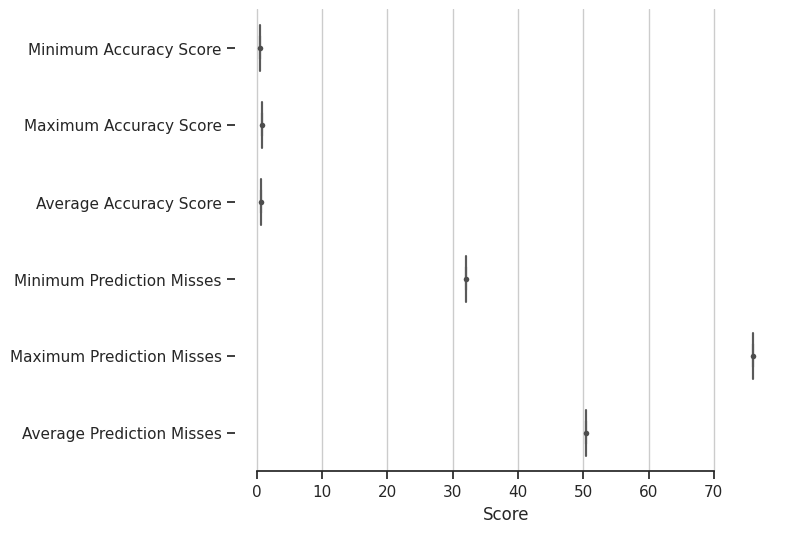

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dictionary to store the metrics and their corresponding scores
results_dict = {
    'Minimum Accuracy Score': Final[Final.argmin()],
    'Maximum Accuracy Score': Final[Final.argmax()],
    'Average Accuracy Score': np.average(Final),
    'Minimum Prediction Misses': predErr[predErr.argmin()],
    'Maximum Prediction Misses': predErr[predErr.argmax()],
    'Average Prediction Misses': np.average(predErr)
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Score'])

# Initialize the figure with a horizontal boxplot
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x=results_df['Score'], y=results_df.index,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=results_df['Score'], y=results_df.index,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="Score", ylabel="")
sns.despine(trim=True, left=True)


This code is visualizing the results of a machine learning model trained on a dataset using **Seaborn**, a Python data visualization library.

The first part of the code creates a dictionary called results_dict to store the various metrics and their corresponding scores. These metrics include the minimum accuracy score, maximum accuracy score, average accuracy score, minimum prediction misses, maximum prediction misses, and average prediction misses.

The dictionary is then converted into a Pandas DataFrame called results_df.

The code then creates a horizontal boxplot using sns.boxplot and adds in individual points to show each observation using sns.stripplot. The boxplot shows the distribution of the scores for each metric, while the points show the individual scores.

Finally, the code tweaks the visual presentation of the plot by adding gridlines, removing the left spine, and setting the x-axis label to "Score".

# **Introducing the SVM Classifiers**

In [ ]:
# Create the radial basis function kernel version of a Support Vector Machine classifier
rbf_clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)


This line of code creates an SVM classifier using a radial basis function kernel. It sets various hyperparameters for the SVM, such as the penalty parameter C, the cache size, the decision function shape, and the kernel type (in this case, rbf).

In [ ]:
# Create the linear kernel version of a Support Vector Machine classifier
lin_clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)


This line of code creates an SVM classifier using a linear kernel.

In [ ]:
# Create the polynomial kernel version of a Support Vector Machine classifier
poly_clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovo', degree=3, gamma='auto', kernel='poly',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)


This line of code creates an SVM classifier using a polynomial kernel.

In [ ]:
# Create the sigmoid kernel version of a Support Vector Machine classifier
sig_clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovo', degree=3, gamma='auto', kernel='sigmoid',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)

NameError: ignored

This line of code creates an SVM classifier using a sigmoid kernel.             All four SVM classifiers have similar hyperparameters, but they differ in their choice of kernel. The choice of kernel can greatly affect the performance of an SVM classifier, so it's often useful to try several different kernels to see which one works best for a our academic performace dataset.

## **Split Data, Train, and Test - SVMs**

In [ ]:
res_rbf = []
predMiss_rbf = []
res_lin = []
predMiss_lin = []
res_poly = []
predMiss_poly = []
res_sig = []
predMiss_sig = []

for _ in range(1000):
    # Randomly sample our training data
    data_train = data.sample(frac=0.7)
    # train data without label
    data_train_X = data_train.loc[:, lambda x: [l for l in data if l != "Class"]]
    # labels of train data 
    data_train_Y = data_train.loc[:, lambda x: "Class"]

    # The rest is test data
    data_test = data.loc[~data.index.isin(data_train.index)]
    # Test data without label
    data_test_X = data_test.loc[:, lambda x: [l for l in data if l != "Class"]]
    # labels of test data 
    data_test_Y = data_test.loc[:, lambda x: "Class"]

    # Train svms
    rbf_clf.fit(data_train_X, data_train_Y)
    lin_clf.fit(data_train_X, data_train_Y)
    poly_clf.fit(data_train_X, data_train_Y)
    sig_clf.fit(data_train_X, data_train_Y)
    
    #Sum the prediction misses. Since this is a smaller dataset, 
    predMiss_rbf.append((data_test_Y != rbf_clf.predict(data_test_X)).sum())
    predMiss_lin.append((data_test_Y != lin_clf.predict(data_test_X)).sum())
    predMiss_poly.append((data_test_Y != poly_clf.predict(data_test_X)).sum())
    predMiss_sig.append((data_test_Y != sig_clf.predict(data_test_X)).sum())
    # Score the mean accuracy on the test data and append results in a list
    res_rbf.append(rbf_clf.score(data_test_X, data_test_Y))
    res_lin.append(lin_clf.score(data_test_X, data_test_Y))
    res_poly.append(poly_clf.score(data_test_X, data_test_Y))
    res_sig.append(sig_clf.score(data_test_X, data_test_Y))

# Convert results and prediction lists to an array and look at the minimums and the averages
predErr_rbf = np.hstack(predMiss_rbf)
Final_rbf = np.hstack(res_rbf)
predErr_lin = np.hstack(predMiss_lin)
Final_lin = np.hstack(res_lin)
predErr_poly = np.hstack(predMiss_poly)
Final_poly = np.hstack(res_poly)
predErr_sig = np.hstack(predMiss_sig)
Final_sig = np.hstack(res_sig)


print('RBF Minimum Accuracy Score:   %.8f' % Final_rbf[Final_rbf.argmin()])
print('RBF Maximum Accuracy Score:   %.8f' % Final_rbf[Final_rbf.argmax()])
print('RBF Average Accuracy Score:   %.8f' % np.average(Final_rbf))
print('------------------------------------------------')
print('Linear Minimum Accuracy Score:   %.8f' % Final_lin[Final_lin.argmin()])
print('Linear Maximum Accuracy Score:   %.8f' % Final_lin[Final_lin.argmax()])
print('Linear Average Accuracy Score:   %.8f' % np.average(Final_lin))
print('------------------------------------------------')
print('Polynomial Minimum Accuracy Score:   %.8f' % Final_poly[Final_poly.argmin()])
print('Polynomial Maximum Accuracy Score:   %.8f' % Final_poly[Final_poly.argmax()])
print('Polynomial Average Accuracy Score:   %.8f' % np.average(Final_poly))
print('------------------------------------------------')
print('Sigmoid Minimum Accuracy Score:   %.8f' % Final_sig[Final_sig.argmin()])
print('Sigmoid Maximum Accuracy Score:   %.8f' % Final_sig[Final_sig.argmax()])
print('Sigmoid Average Accuracy Score:   %.8f' % np.average(Final_sig))
print('================================================')
#print('Minimum Prediction Misses:   %d' % predErr[predErr.argmin()])
#print('Maximum Prediction Misses:   %d' % predErr[predErr.argmax()])
print('RBF Average Prediction Misses:   %.2f' % np.average(predErr_rbf))
print('Linear Average Prediction Misses:   %.2f' % np.average(predErr_lin))
print('Polynomial Average Prediction Misses:   %.2f' % np.average(predErr_poly))
print('Sigmoid Average Prediction Misses:   %.2f' % np.average(predErr_sig))

RBF Minimum Accuracy Score:   0.64583333
RBF Maximum Accuracy Score:   0.83333333
RBF Average Accuracy Score:   0.74409722
------------------------------------------------
Linear Minimum Accuracy Score:   0.64583333
Linear Maximum Accuracy Score:   0.87500000
Linear Average Accuracy Score:   0.75652083
------------------------------------------------
Polynomial Minimum Accuracy Score:   0.33333333
Polynomial Maximum Accuracy Score:   0.54861111
Polynomial Average Accuracy Score:   0.43915278
------------------------------------------------
Sigmoid Minimum Accuracy Score:   0.61805556
Sigmoid Maximum Accuracy Score:   0.81250000
Sigmoid Average Accuracy Score:   0.72866667
RBF Average Prediction Misses:   36.85
Linear Average Prediction Misses:   35.06
Polynomial Average Prediction Misses:   80.76
Sigmoid Average Prediction Misses:   39.07


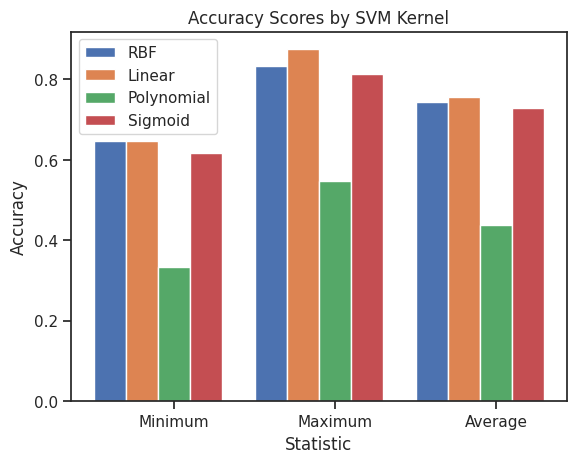

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
rbf_data = [Final_rbf[Final_rbf.argmin()], Final_rbf[Final_rbf.argmax()], np.average(Final_rbf)]
lin_data = [Final_lin[Final_lin.argmin()], Final_lin[Final_lin.argmax()], np.average(Final_lin)]
poly_data = [Final_poly[Final_poly.argmin()], Final_poly[Final_poly.argmax()], np.average(Final_poly)]
sig_data = [Final_sig[Final_sig.argmin()], Final_sig[Final_sig.argmax()], np.average(Final_sig)]

# Define labels
labels = ['Minimum', 'Maximum', 'Average']

# Define x locations for bars
x = np.arange(len(labels))

# Define bar width
width = 0.2

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot bars for each SVM kernel
ax.bar(x - width, rbf_data, width, label='RBF')
ax.bar(x, lin_data, width, label='Linear')
ax.bar(x + width, poly_data, width, label='Polynomial')
ax.bar(x + 2*width, sig_data, width, label='Sigmoid')

# Set axis labels and title
ax.set_xlabel('Statistic')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores by SVM Kernel')

# Set x axis tick labels
ax.set_xticks(x + width)
ax.set_xticklabels(labels)

# Add legend
ax.legend()

# Show plot
plt.show()


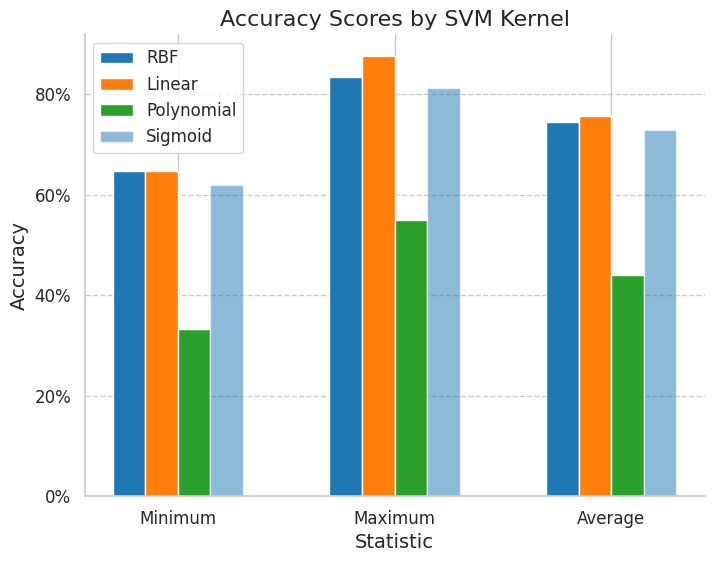

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
rbf_data = [Final_rbf[Final_rbf.argmin()], Final_rbf[Final_rbf.argmax()], np.average(Final_rbf)]
lin_data = [Final_lin[Final_lin.argmin()], Final_lin[Final_lin.argmax()], np.average(Final_lin)]
poly_data = [Final_poly[Final_poly.argmin()], Final_poly[Final_poly.argmax()], np.average(Final_poly)]
sig_data = [Final_sig[Final_sig.argmin()], Final_sig[Final_sig.argmax()], np.average(Final_sig)]

# Define labels
labels = ['Minimum', 'Maximum', 'Average']

# Define x locations for bars
x = np.arange(len(labels))

# Define bar width
width = 0.15

# Define colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each SVM kernel
ax.bar(x - 1.5*width, rbf_data, width, color=colors[0], label='RBF')
ax.bar(x - 0.5*width, lin_data, width, color=colors[1], label='Linear')
ax.bar(x + 0.5*width, poly_data, width, color=colors[2], label='Polynomial')
ax.bar(x + 1.5*width, sig_data, width, color=colors[0], alpha=0.5, label='Sigmoid')

# Set axis labels and title
ax.set_xlabel('Statistic', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracy Scores by SVM Kernel', fontsize=16)

# Set x axis tick labels and font size
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)

# Set y axis tick labels and font size
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()], fontsize=12)

# Add legend and set font size
ax.legend(fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()


***Colors:*** The RBF and Polynomial bars are colored in blue and green, respectively, while the Linear bar is colored in orange. The Sigmoid bar is also colored in blue but with an alpha value of 0.5 to make it slightly transparent. These colors were chosen to be visually distinct and pleasing.

***Font sizes:*** The font size for the axis labels, tick labels, and legend has been increased to make them more legible.

***Y-axis formatting:*** The y-axis tick labels are formatted as percentages to make the values easier to read.

***Gridlines:*** Horizontal gridlines have been added to aid in reading the y-axis values.

***Spines:*** The top and right spines have been removed to make the plot cleaner.